In [2]:
import hicstraw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors


In [1]:
import diffraction

from diffraction import utils as DifFracTion_utils
from diffraction import src as DifFracTion

In [ ]:
# Chromosome nomenclature depends on the way the .hic file was generated.
# For example, chromosomes can be named as "chr21" or "21".

hic_path = "../test_data/GM12878-HRC.hic" #Not included in repo
chromosome = "21"
resolution = 100000
chromosome_length = DifFracTion_utils.get_chromosome_length(hic_path, chromosome)



In [ ]:
#prepare_MatrixZoomData uses KR balancing by default, however any other balancing method can be specified if the hic matrix possesses it.
matrix=DifFracTion_utils.prepare_MatrixZoomData(hic_path, chromosome, resolution)
raw_matrix = DifFracTion_utils.rawMatrix(matrix,chromosome_length)

## Downsampling example

We generate synthetic datasets to show how DifFracTion normalizes by accounting coverage differences


In [ ]:
downsampling_factor = 0.25
matrix_A=DifFracTion_utils.synthetic_datasets(raw_matrix,1)
matrix_B=DifFracTion_utils.synthetic_datasets(raw_matrix,downsampling_factor)

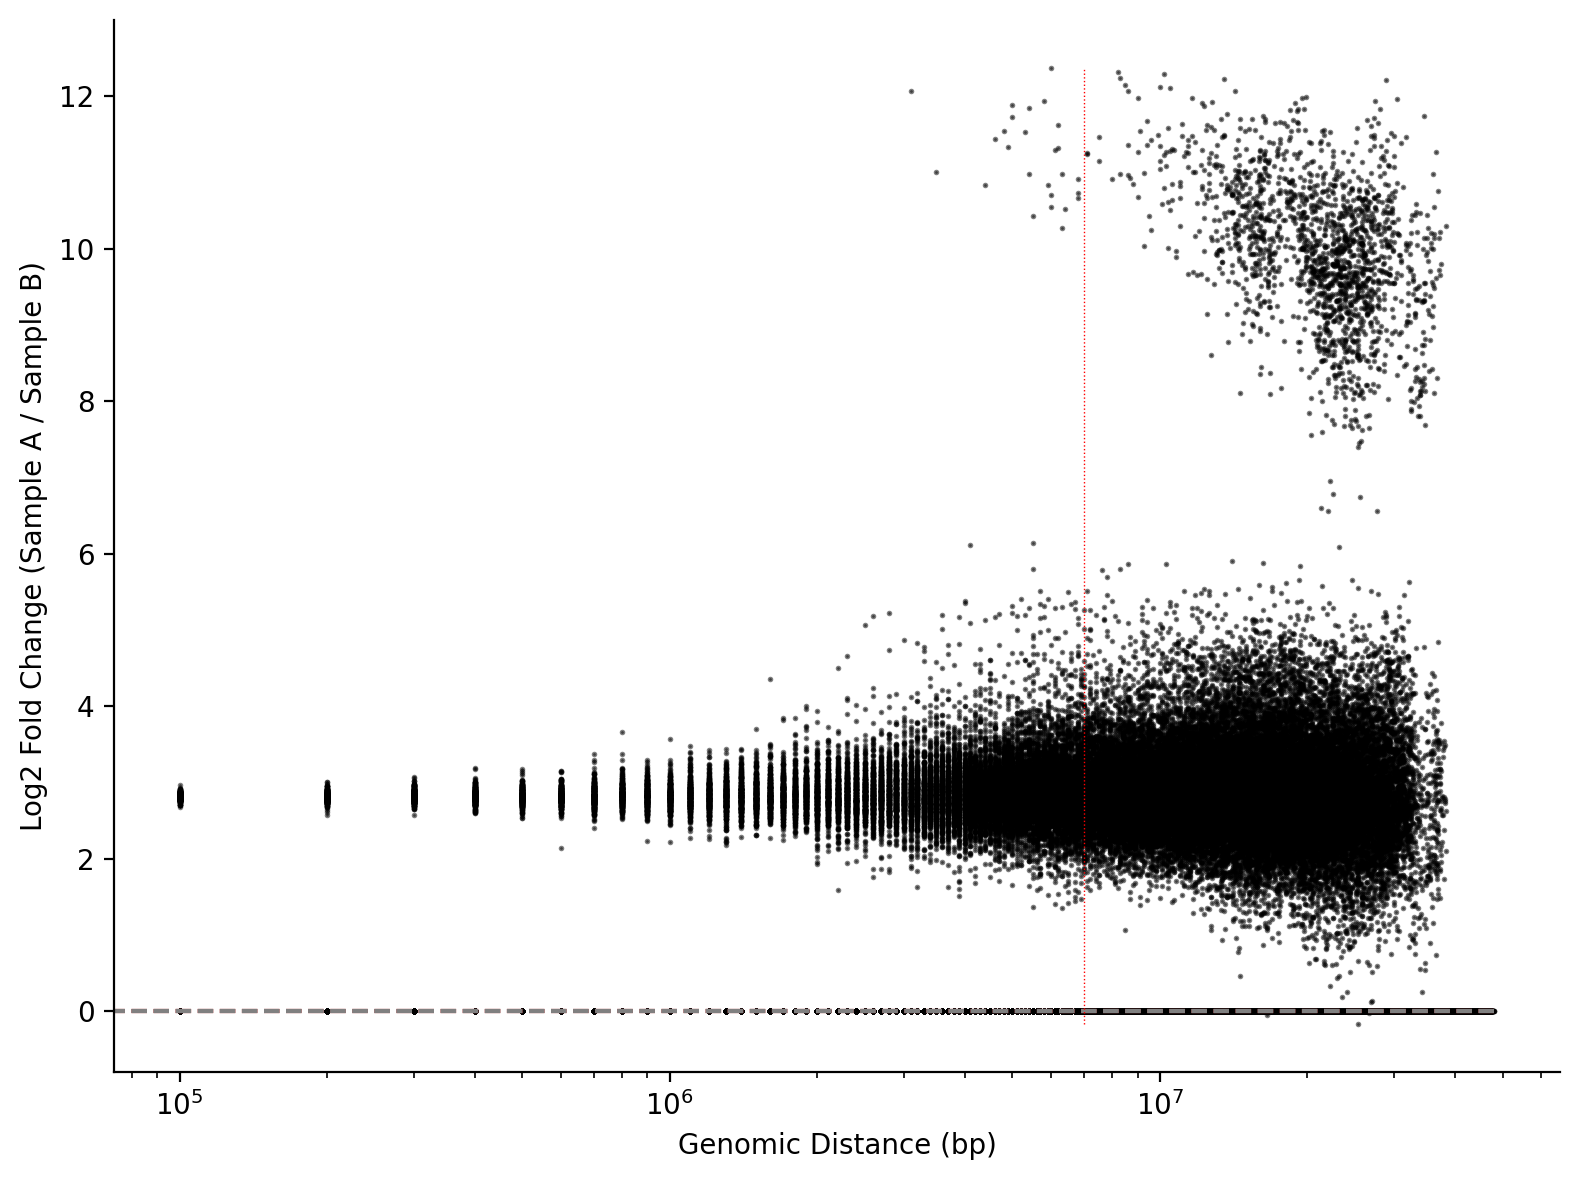

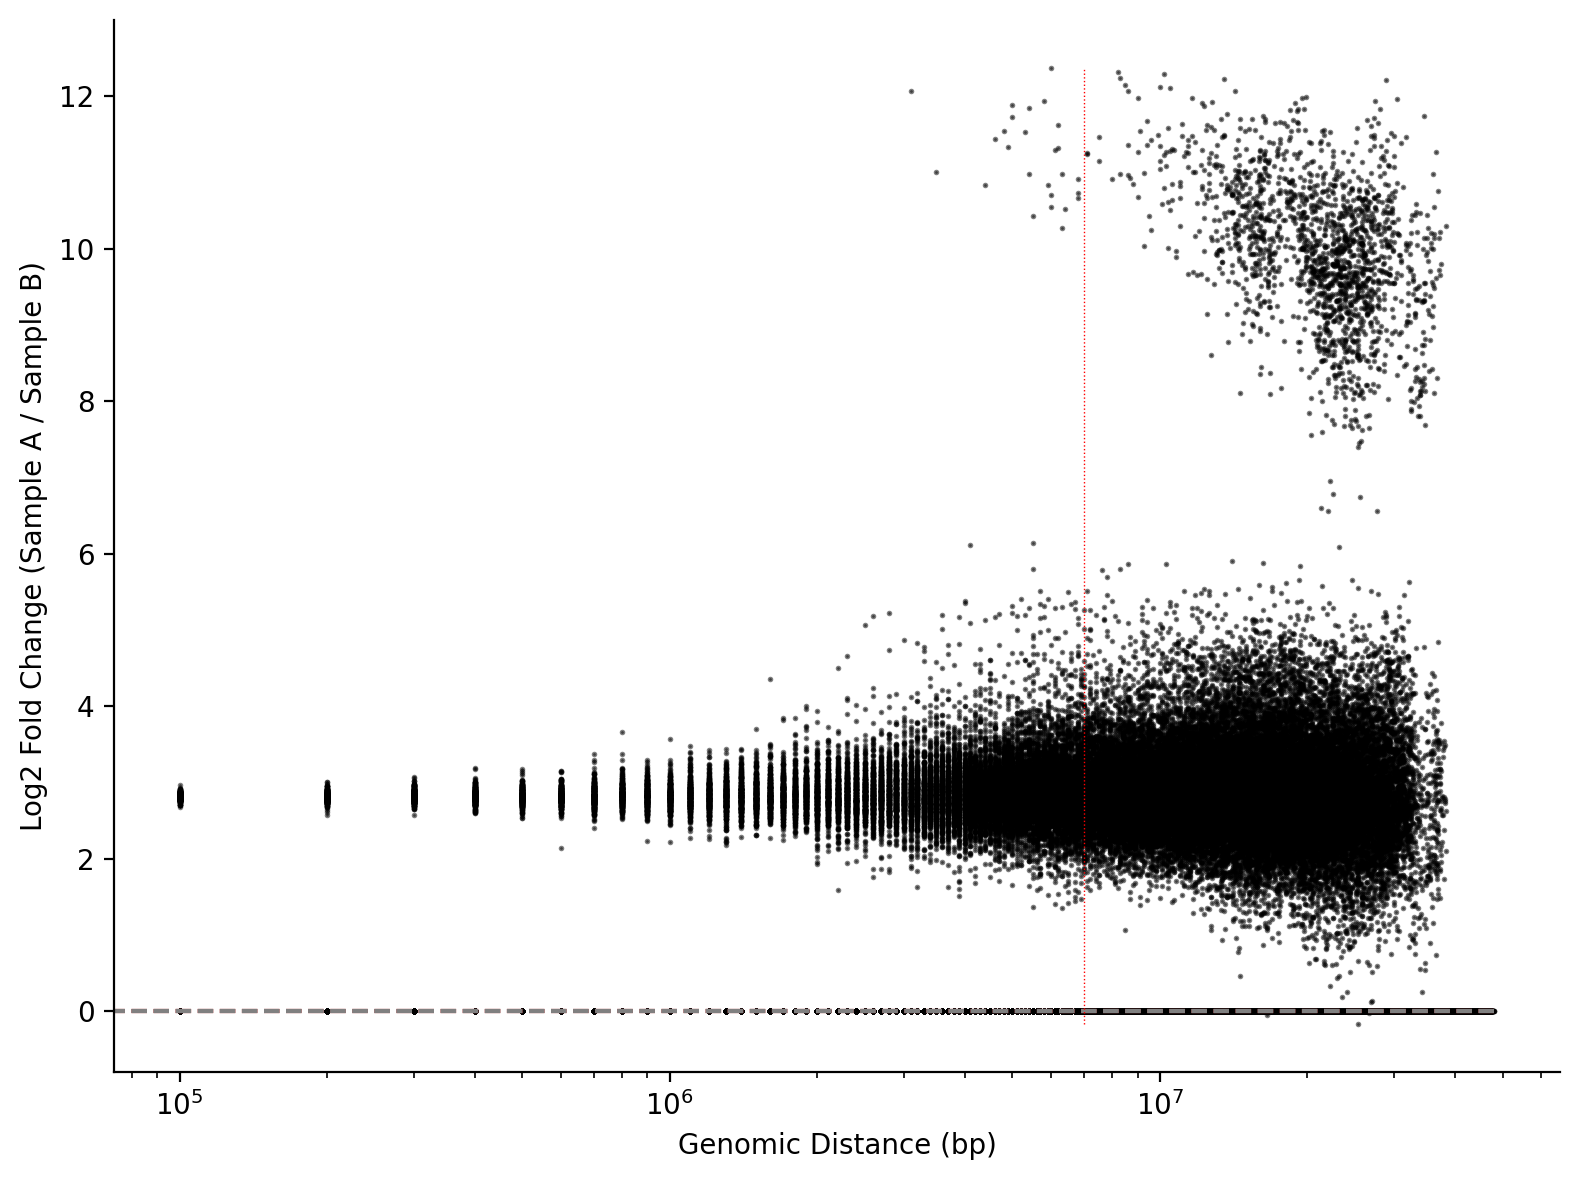

In [ ]:
# Differences between matrix_A and matrix_B 
DifFracTion_utils.plot_MA(matrix_A,matrix_B,resolution,log2_fc_cutoff=0)

## DifFracTion Normalizations


Alpha Based


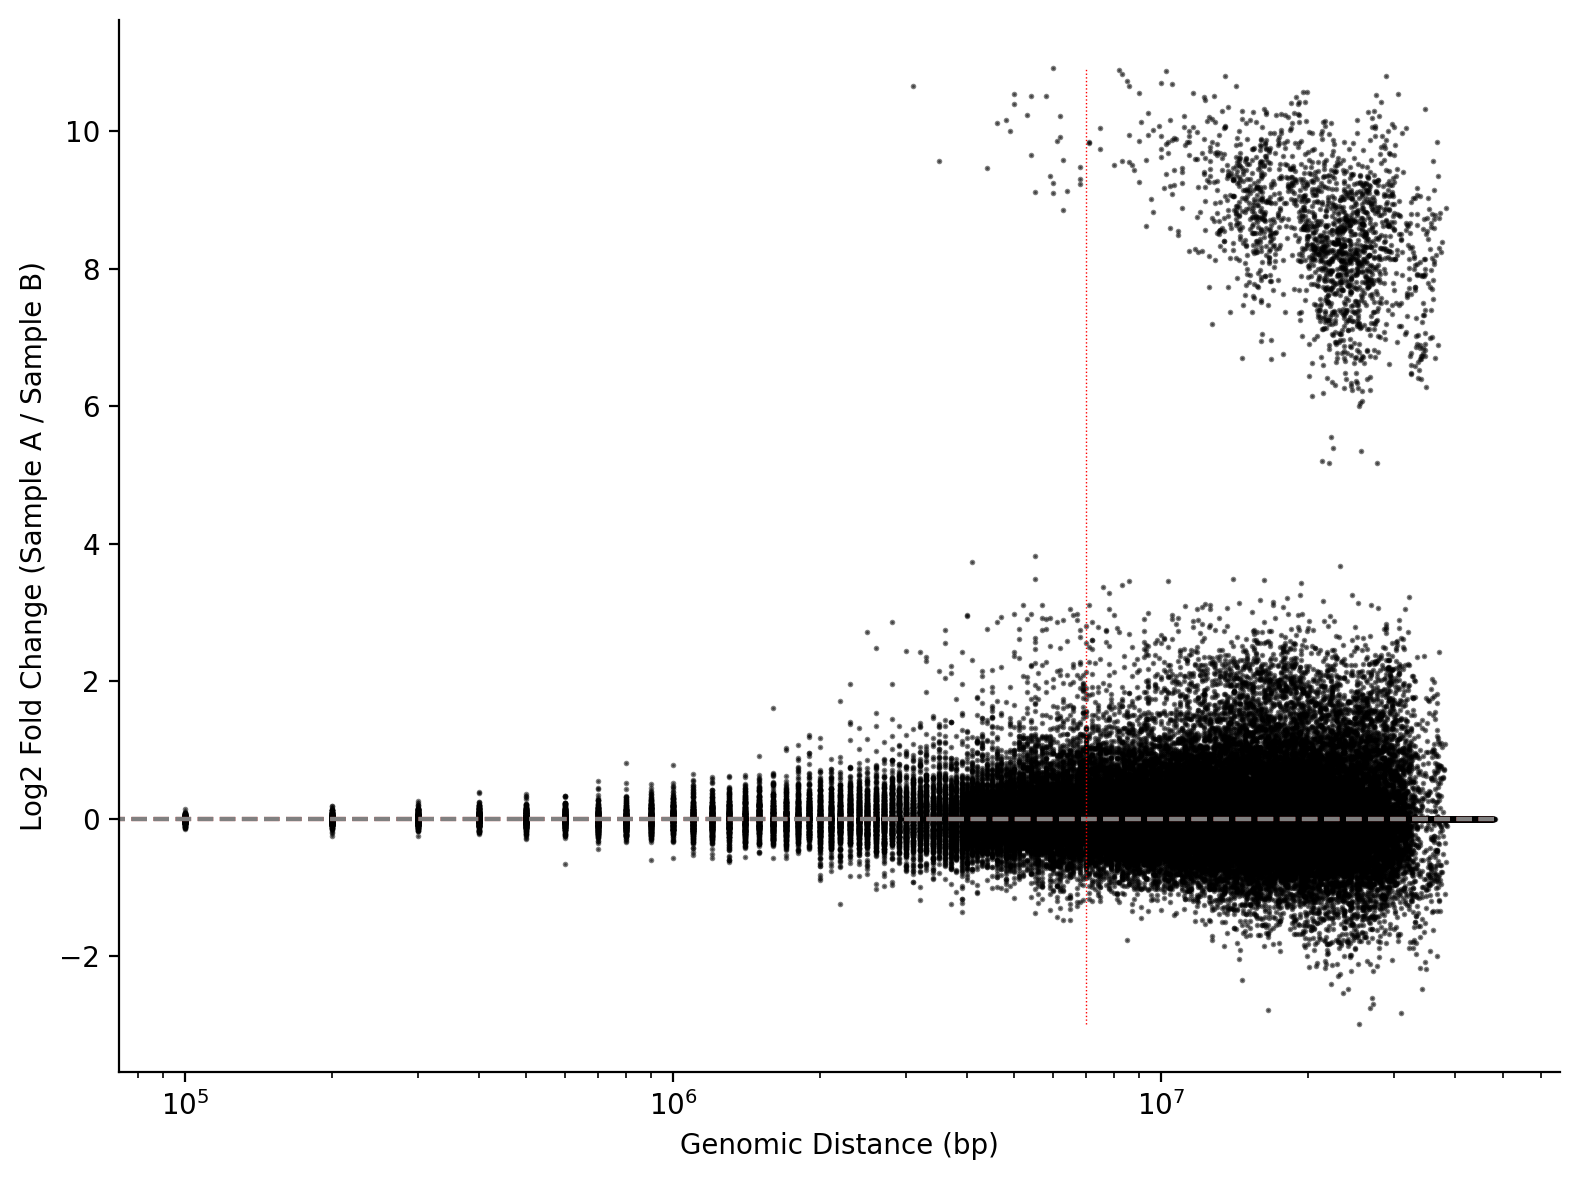

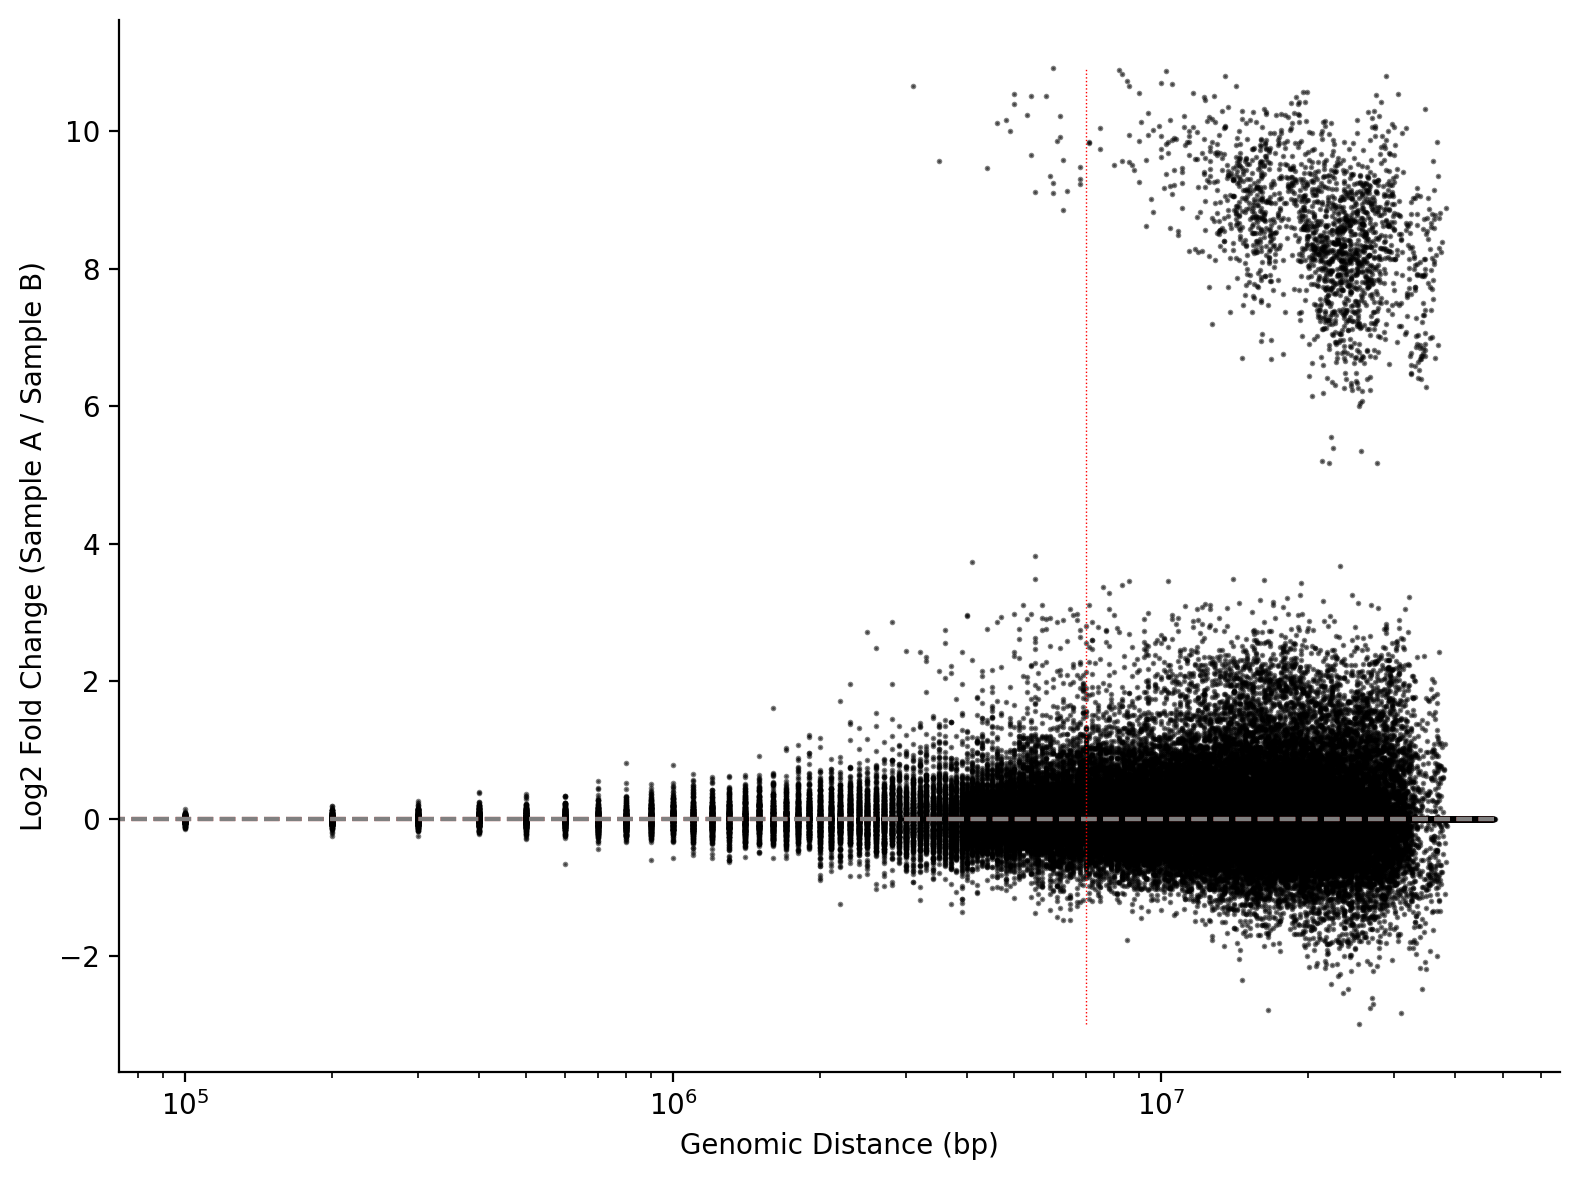

In [ ]:
#DifFracTion alpha normalization
matrix_A_norm,matrix_B_norm,_,_=DifFracTion.alpha_normalization(matrix_A,matrix_B,chromosome_length,resolution)
DifFracTion_utils.plot_MA(matrix_A_norm,matrix_B_norm,resolution,log2_fc_cutoff=0)

Iterative

Final scaling factor applied to matrix B: 6.8646
Final error after iterative normalization: 0.0008


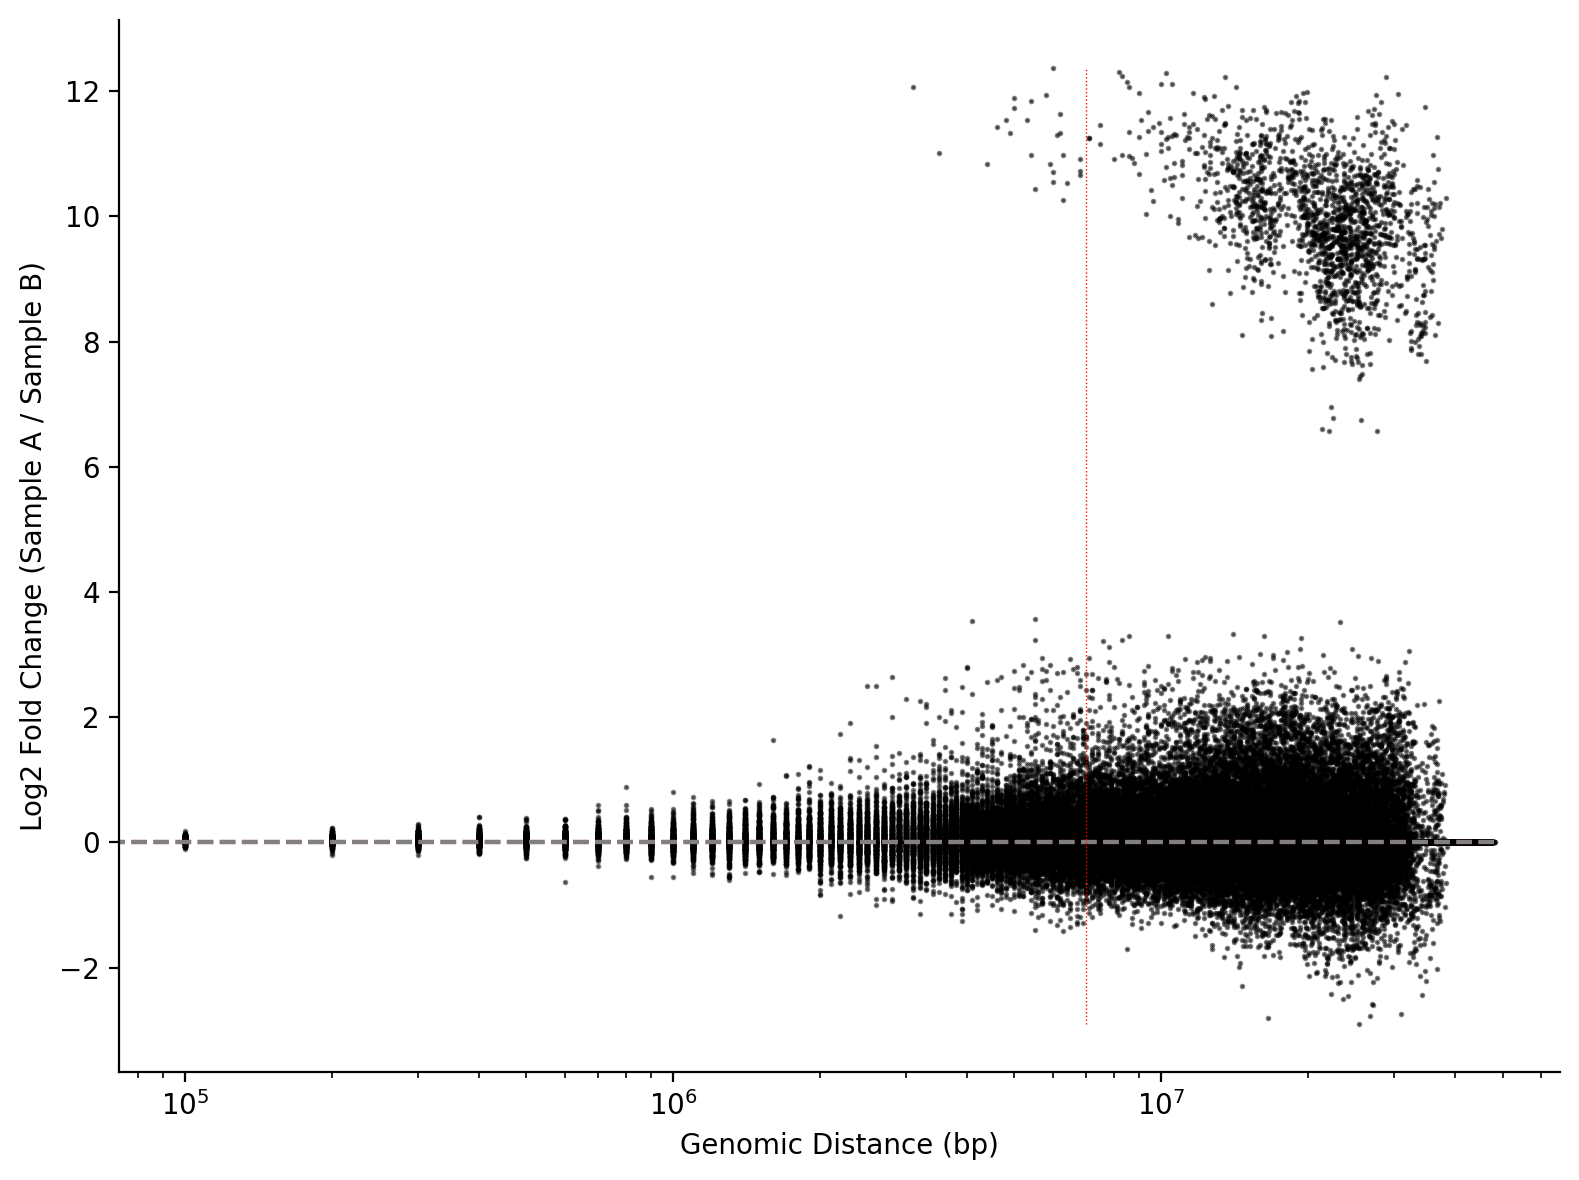

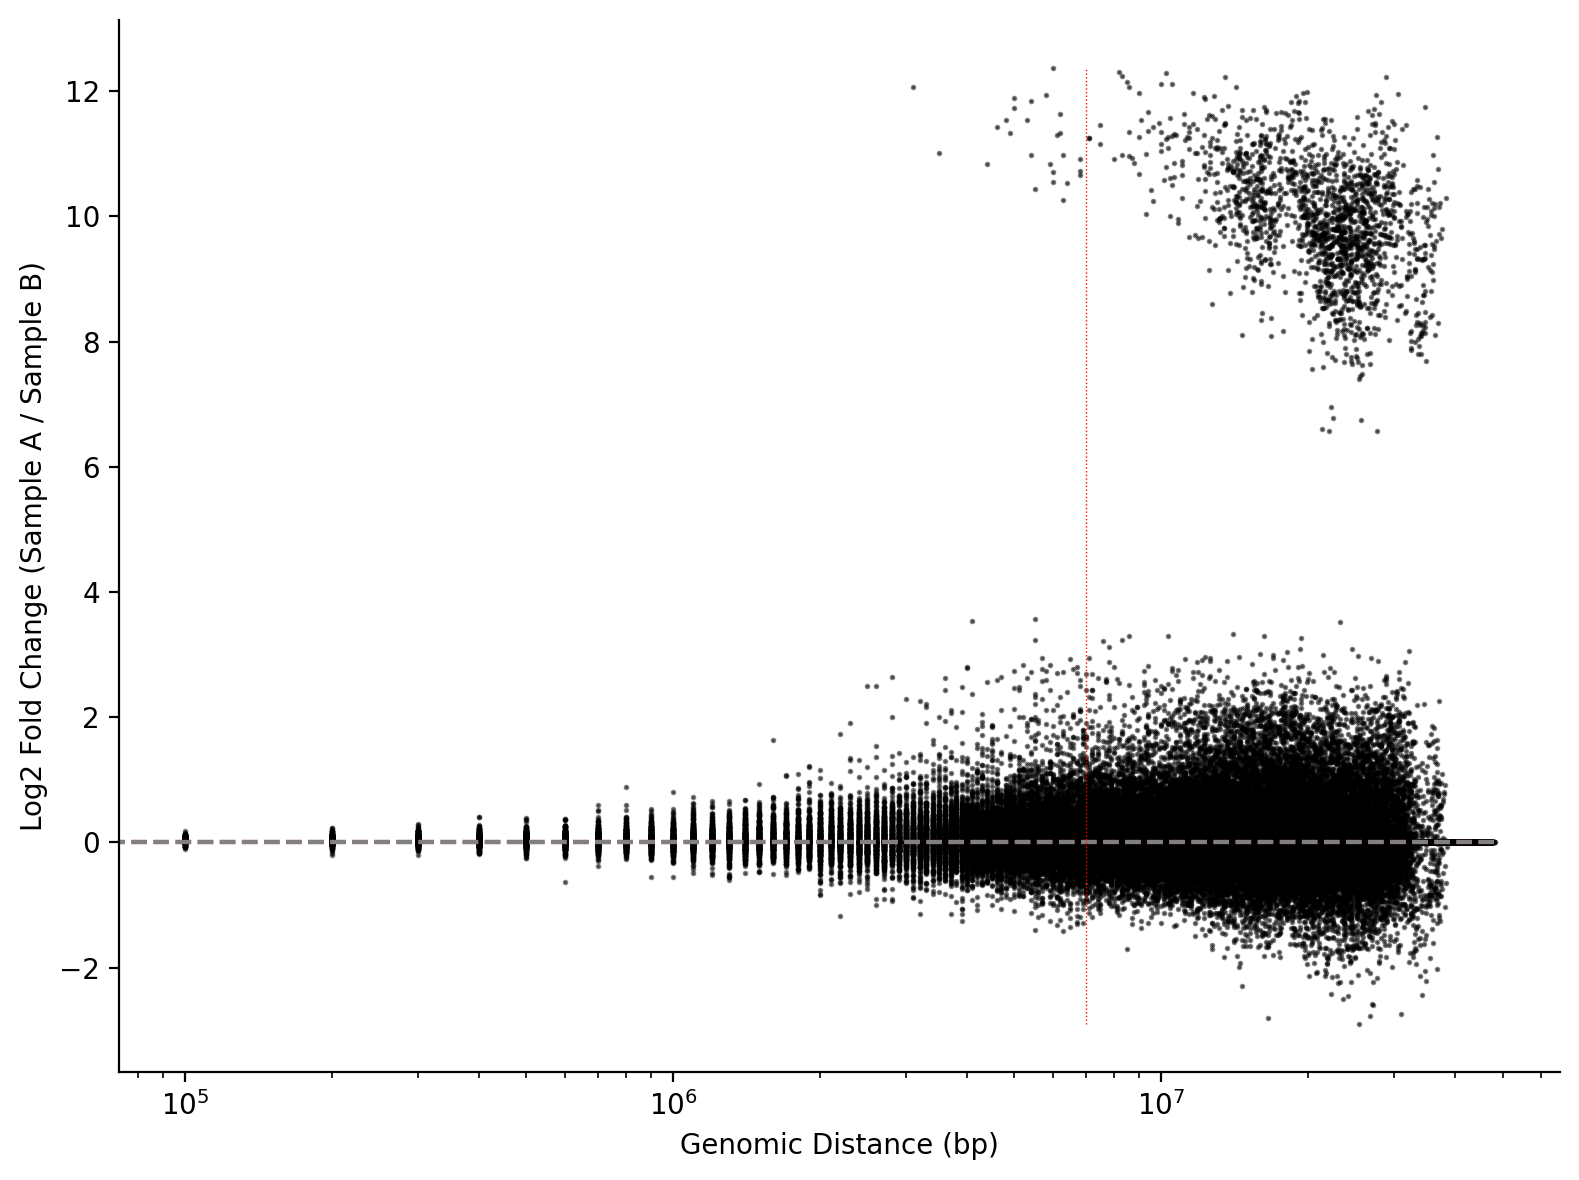

In [ ]:
matrix_A_norm_iter,matrix_B_norm_iter,_,_=DifFracTion.iterative_normalization(matrix_A,matrix_B,chromosome_length,resolution)
DifFracTion_utils.plot_MA(matrix_A_norm_iter,matrix_B_norm_iter,resolution,log2_fc_cutoff=0)


## DCIs


For DCI analysis we encourage the use of a HPC system. Here we show results with N=20 (number of subsampling events), however reported results are expected with N=1000.


In [36]:
dcis=DifFracTion.identify_differential_interactions(matrix_A_norm,matrix_B_norm,resolution,
													method='log2fc', subsample_n=20,
                                                	log2_fc_cutoff=0,p_value_threshold=0.01,bayesian=False)


Starting permutation 1
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20


In [39]:
dcis_bayesian=DifFracTion.identify_differential_interactions(matrix_A_norm,matrix_B_norm,resolution,
													method='log2fc', subsample_n=20,
                                                	log2_fc_cutoff=0,p_value_threshold=0.01,bayesian=True)

Starting permutation 1
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
